# Importing the dependencies

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


# Import the boston house dataset

In [31]:
# Fetch Boston Housing dataset from OpenML
house_price_dataframe=fetch_openml(name="boston", version=1, as_frame=True)

In [32]:
print(house_price_dataframe)

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4

In [33]:
house_price_dataframe.frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [40]:
#add the target column(price) to the dataframe
house_price_dataframe.frame['Price']=house_price_dataframe.target

In [41]:
house_price_dataframe.frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,36.2


In [42]:
house_price_dataframe.frame.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [43]:
house_price_dataframe.frame.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


# Understanding the correlation between various features of dataset

In [44]:
correlation=house_price_dataframe.frame.corr()

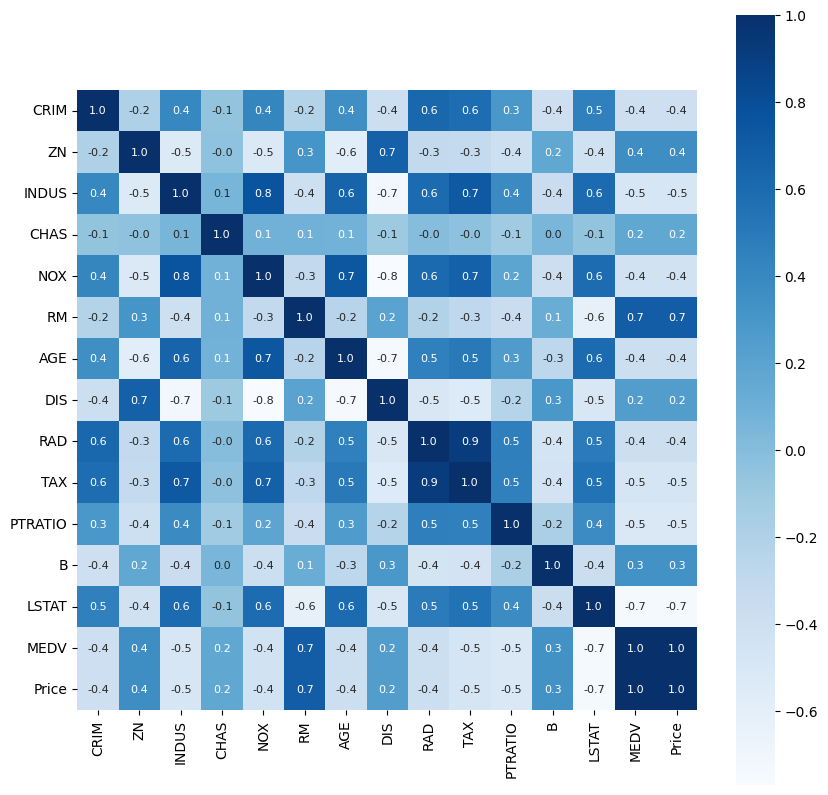

In [47]:
#constructing the heat map to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,square=True,fmt=".1f",annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

# Splitting all the data

In [51]:
X=house_price_dataframe.frame.drop(['Price'],axis=1)
Y=house_price_dataframe.frame['Price']

In [52]:
#spliting the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [53]:
print(X.shape,X_train.shape,X_test.shape)

(506, 14) (404, 14) (102, 14)


# Model traning

In [57]:
model=XGBRegressor(enable_categorical=True)

In [58]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Evaluation

In [59]:
traning_data_prediction=model.predict(X_train)

In [61]:
print(traning_data_prediction)

[23.097311  21.001585  20.10055   34.700153  13.90036   13.498717
 22.000612  15.200103  10.899915  22.7001    13.802606   5.6002474
 29.798906  49.9998    34.899715  20.600262  23.399734  19.204195
 32.69968   19.601608  27.001678   8.399641  46.0007    21.701035
 27.099575  19.39852   19.299866  24.799658  22.598886  31.69627
 18.501064   8.700133  17.400684  23.698807  13.300661  10.500919
 12.703308  24.99905   19.699413  14.904433  24.2027    25.000849
 14.901204  16.999454  15.601203  12.700562  24.500063  15.0022335
 49.999805  17.496695  21.200941  32.00074   15.600297  22.899862
 19.296934  18.700504  23.300095  37.200394  30.099627  33.10154
 21.000093  49.999294  13.398617   5.000886  16.499544   8.400109
 28.69929   19.499092  20.598295  45.39984   39.800697  33.39945
 19.799904  33.399746  25.300493  50.000668  12.497821  17.399126
 18.599735  22.599375  49.999496  23.802103  23.299768  23.100945
 41.698822  16.101614  31.598984  36.099995   7.0001874 20.400595
 20.000206 

In [64]:
#squared error
score_1=metrics.r2_score(Y_train,traning_data_prediction)

#mean absolute error
score_2=metrics.mean_absolute_error(Y_train,traning_data_prediction)

print('R Squared error: ', score_1)
print("mean_squared_error: ", score_2)

R Squared error:  0.9999999792626258
mean_squared_error:  0.0009383163829841698


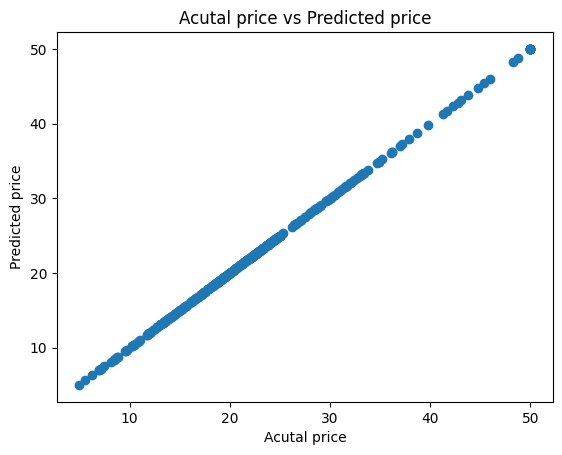

In [68]:
plt.scatter(Y_train,traning_data_prediction)
plt.xlabel('Acutal price')
plt.ylabel('Predicted price')
plt.title('Acutal price vs Predicted price')
plt.show()


In [65]:
test_data_prediction=model.predict(X_test)

In [66]:
#squared error
score_1=metrics.r2_score(Y_test,test_data_prediction)

#mean absolute error
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)

print('R Squared error: ', score_1)
print("mean_squared_error: ", score_2)

R Squared error:  0.9993642413820083
mean_squared_error:  0.14372301475674493


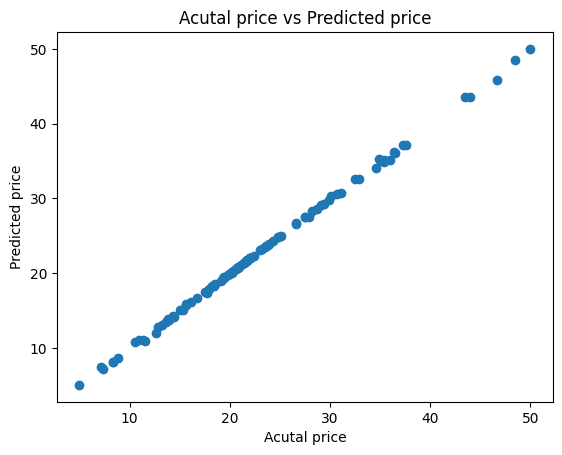

In [69]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Acutal price')
plt.ylabel('Predicted price')
plt.title('Acutal price vs Predicted price')
plt.show()
